In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score

from tqdm import tqdm
from math import log10

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import top_k_accuracy_score
from sklearn.feature_selection import f_classif, f_regression

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# SDP network

In [2]:
runtimes = pd.read_excel('C:/Users/Jasmin/Documents/MSc-Thesis/Data/Runtime/Results-MIPVerify_SDPdMLPa.xlsx')
runtimes

,SampleNumber,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,1,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
1,2,9600.323414,UserLimit,9600.080699,UserLimit,9600.184597,UserLimit,9600.010288,UserLimit,9600.010288,TIMEOUT
2,3,9600.157577,UserLimit,1258.149140,InfeasibleOrUnbounded,3025.400426,Infeasible,2938.074613,Infeasible,1258.149140,SolveTime_conf1
3,4,83.344657,InfeasibleOrUnbounded,170.613330,InfeasibleOrUnbounded,54.733004,Infeasible,41.134581,Infeasible,41.134581,SolveTime_conf3
4,5,5567.992290,InfeasibleOrUnbounded,220.795008,InfeasibleOrUnbounded,538.053177,Infeasible,300.046997,Infeasible,220.795008,SolveTime_conf1
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,12.674720,InfeasibleOrUnbounded,18608.097787,UserLimit,25.863838,Infeasible,172.116870,Infeasible,12.674720,SolveTime_default
9996,9997,18.379950,InfeasibleOrUnbounded,110.131027,InfeasibleOrUnbounded,50.209194,Infeasible,110.876559,Infeasible,18.379950,SolveTime_default
9997,9998,75.684641,InfeasibleOrUnbounded,105.670172,InfeasibleOrUnbounded,106.346014,Infeasible,102.811690,Infeasible,75.684641,SolveTime_default
9998,9999,1669.967257,InfeasibleOrUnbounded,826.113838,InfeasibleOrUnbounded,1401.266455,Infeasible,1643.462584,Infeasible,826.113838,SolveTime_conf1


### Config Default

In [11]:
runs_default = runtimes[['SolveTime_default', 'SolveStatus_default']]
runs_default = runs_default[~runs_default.SolveStatus_default.str.contains("UserLimit")]
runs_default

,SolveTime_default,SolveStatus_default
0,104.393417,InfeasibleOrUnbounded
3,83.344657,InfeasibleOrUnbounded
4,5567.992290,InfeasibleOrUnbounded
5,105.969700,InfeasibleOrUnbounded
10,75.047204,InfeasibleOrUnbounded
...,...,...
9995,12.674720,InfeasibleOrUnbounded
9996,18.379950,InfeasibleOrUnbounded
9997,75.684641,InfeasibleOrUnbounded
9998,1669.967257,InfeasibleOrUnbounded


<AxesSubplot:xlabel='SolveTime_default', ylabel='SolveTime_default'>

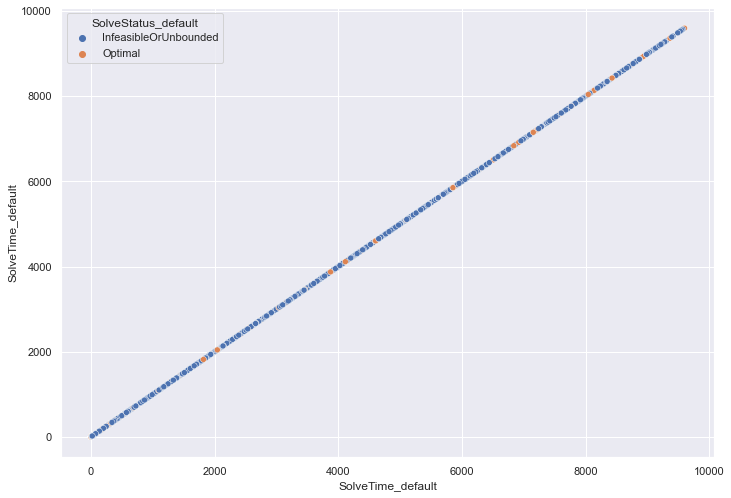

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="SolveTime_default", y="SolveTime_default", data=runs_default, hue="SolveStatus_default")

<AxesSubplot:xlabel='SolveTime_default', ylabel='Count'>

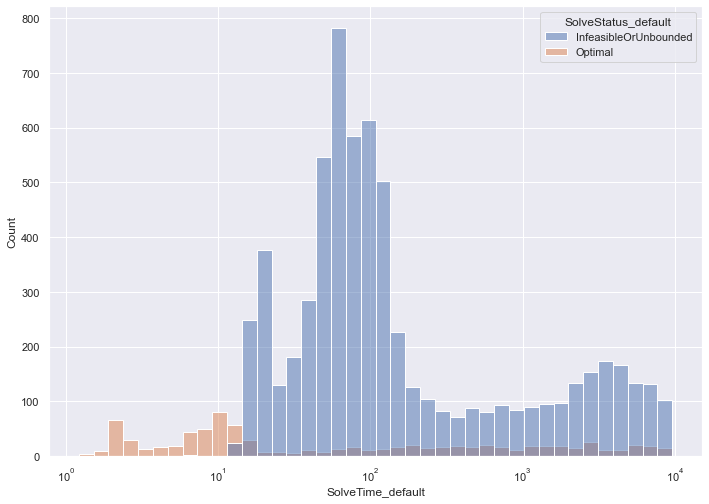

In [43]:
# Histogram
sns.histplot(x = "SolveTime_default", hue = "SolveStatus_default", data = runs_default, log_scale=True)

<AxesSubplot:xlabel='SolveTime_default', ylabel='Density'>

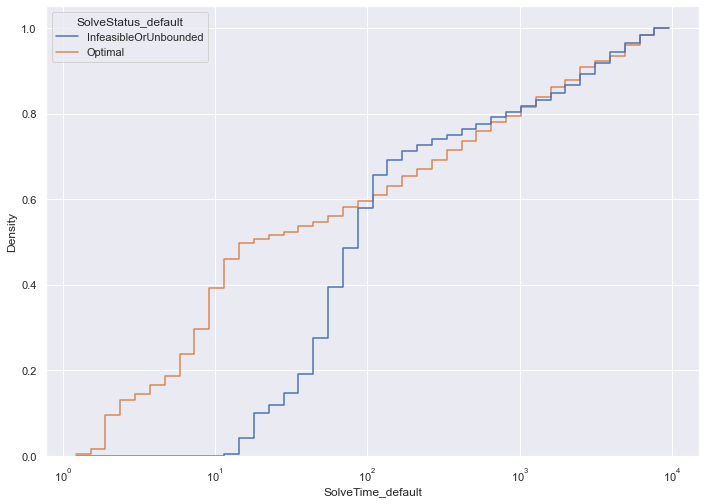

In [44]:
# CDF
sns.histplot(x = "SolveTime_default", hue = "SolveStatus_default", data = runs_default, log_scale=True, element="step", fill=False,
             cumulative=True, stat="density", common_norm=False) 


### Config 1

In [45]:
runs_conf1 = runtimes[['SolveTime_conf1', 'SolveStatus_conf1']]
runs_conf1 = runs_conf1[~runs_conf1.SolveStatus_conf1.str.contains("UserLimit")]
runs_conf1

,SolveTime_conf1,SolveStatus_conf1
0,152.683291,InfeasibleOrUnbounded
2,1258.149140,InfeasibleOrUnbounded
3,170.613330,InfeasibleOrUnbounded
4,220.795008,InfeasibleOrUnbounded
5,211.944221,InfeasibleOrUnbounded
...,...,...
9994,169.627541,InfeasibleOrUnbounded
9996,110.131027,InfeasibleOrUnbounded
9997,105.670172,InfeasibleOrUnbounded
9998,826.113838,InfeasibleOrUnbounded


<AxesSubplot:xlabel='SolveTime_conf1', ylabel='Count'>

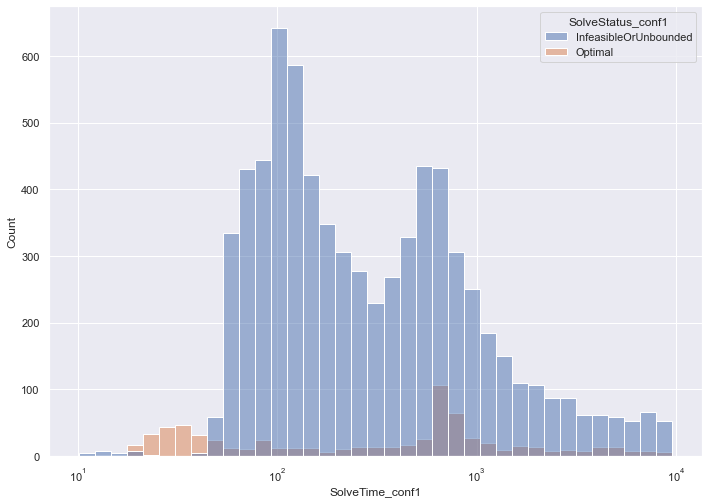

In [46]:
# Histogram
sns.histplot(x = "SolveTime_conf1", hue = "SolveStatus_conf1", data = runs_conf1, log_scale=True)

<AxesSubplot:xlabel='SolveTime_conf1', ylabel='Density'>

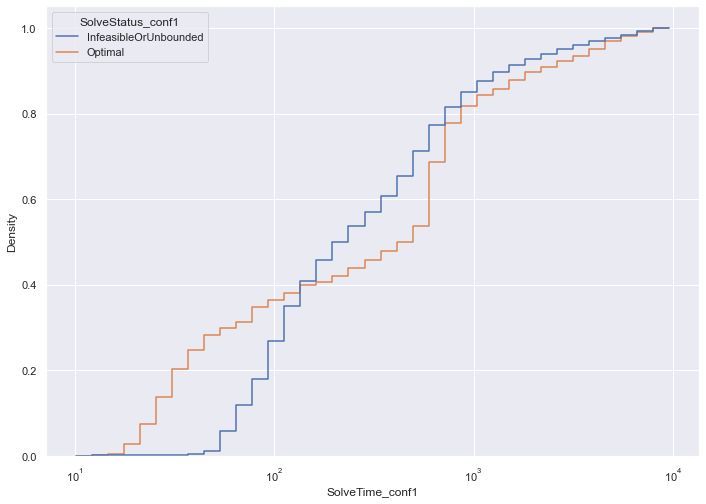

In [47]:
# CDF
sns.histplot(x = "SolveTime_conf1", hue = "SolveStatus_conf1", data = runs_conf1, log_scale=True, element="step", fill=False,
             cumulative=True, stat="density", common_norm=False) 


### Config 2

In [48]:
runs_conf2 = runtimes[['SolveTime_conf2', 'SolveStatus_conf2']]
runs_conf2 = runs_conf2[~runs_conf2.SolveStatus_conf2.str.contains("UserLimit")]
runs_conf2

,SolveTime_conf2,SolveStatus_conf2
0,44.068493,Infeasible
2,3025.400426,Infeasible
3,54.733004,Infeasible
4,538.053177,Infeasible
5,57.114092,Infeasible
...,...,...
9995,25.863838,Infeasible
9996,50.209194,Infeasible
9997,106.346014,Infeasible
9998,1401.266455,Infeasible


<AxesSubplot:xlabel='SolveTime_conf2', ylabel='Count'>

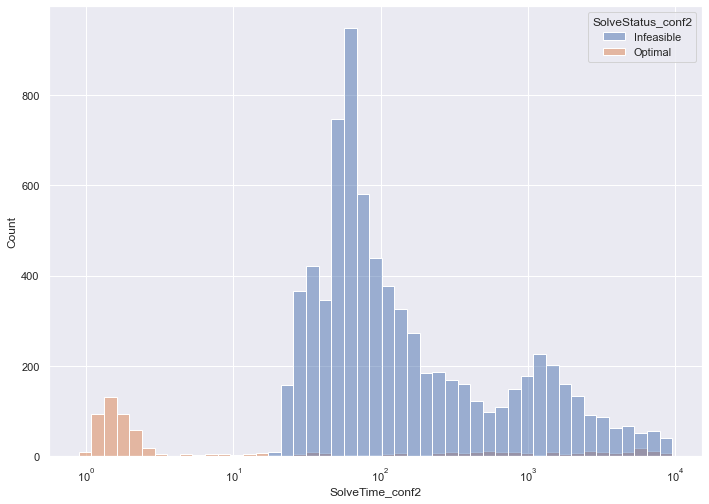

In [49]:
# Histogram
sns.histplot(x = "SolveTime_conf2", hue = "SolveStatus_conf2", data = runs_conf2, log_scale=True)

<AxesSubplot:xlabel='SolveTime_conf2', ylabel='Density'>

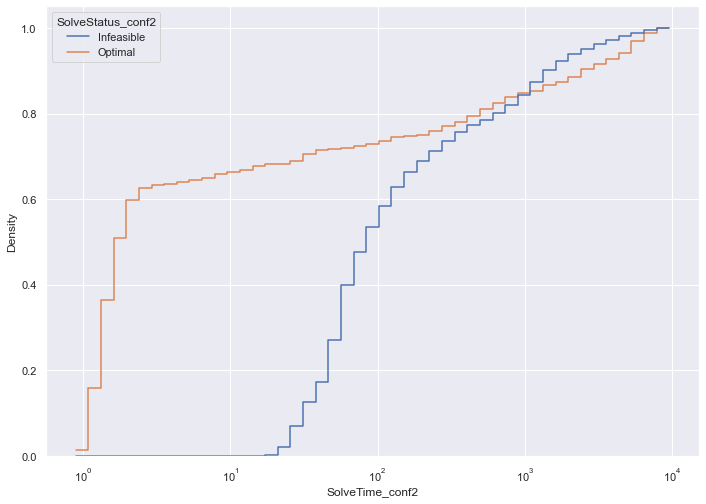

In [50]:
# CDF
sns.histplot(x = "SolveTime_conf2", hue = "SolveStatus_conf2", data = runs_conf2, log_scale=True, element="step", fill=False,
             cumulative=True, stat="density", common_norm=False) 


### Config 3

In [51]:
runs_conf3 = runtimes[['SolveTime_conf3', 'SolveStatus_conf3']]
runs_conf3 = runs_conf3[~runs_conf3.SolveStatus_conf3.str.contains("UserLimit")]
runs_conf3

,SolveTime_conf3,SolveStatus_conf3
0,78.731996,Infeasible
2,2938.074613,Infeasible
3,41.134581,Infeasible
4,300.046997,Infeasible
5,34.494269,Infeasible
...,...,...
9995,172.116870,Infeasible
9996,110.876559,Infeasible
9997,102.811690,Infeasible
9998,1643.462584,Infeasible


<AxesSubplot:xlabel='SolveTime_conf3', ylabel='Count'>

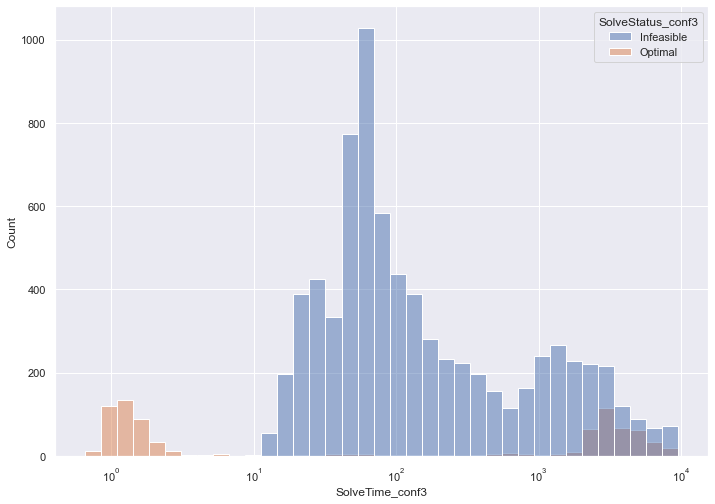

In [52]:
# Histogram
sns.histplot(x = "SolveTime_conf3", hue = "SolveStatus_conf3", data = runs_conf3, log_scale=True)

<AxesSubplot:xlabel='SolveTime_conf3', ylabel='Density'>

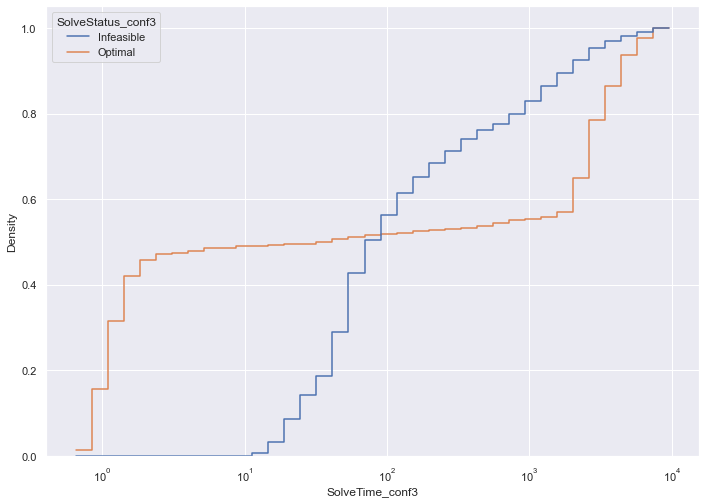

In [53]:
# CDF
sns.histplot(x = "SolveTime_conf3", hue = "SolveStatus_conf3", data = runs_conf3, log_scale=True, element="step", fill=False,
             cumulative=True, stat="density", common_norm=False) 
